torch.Size([224, 224, 3])


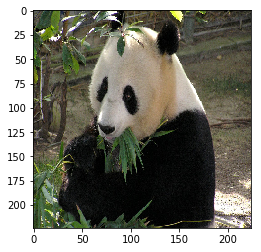

In [137]:
import torch
import torchvision

torch.__version__

import numpy as np
import matplotlib.pyplot as plt

from torch.autograd import Variable

from PIL import Image
from PIL import ImageOps


# 3d tensor object converted to numpy array
panda = np.array(Image.open('panda.jpg').resize( (224,224)))

# open as gray scale
grey_panda = ImageOps.grayscale(Image.open('panda.jpg').resize((224,224)))

#panda = np.array(Image.open('panda.jpg'))
panda_tensor = torch.from_numpy(panda)

panda_tensor.size()
print ( panda_tensor.size() )

# Display panda
plt.imshow(panda)


In [30]:
# slicing tensor
sales = torch.FloatTensor( [1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])

sales[:5]


tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000])

In [29]:
sales[:-5]

tensor([1000.0000,  323.2000,  333.4000])

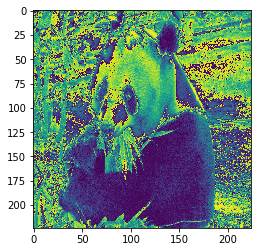

In [169]:
from io import BytesIO
import IPython.display

# selecting one channel from image
# plt.imshow(panda_tensor[:,:,1].numpy())

chan_r = panda_tensor[:,:,0].numpy()
chan_g = panda_tensor[:,:,1].numpy()
chan_b = panda_tensor[:,:,2].numpy()

#chan_r = panda_tensor[0]
#chan_g = panda_tensor[1]
#chan_b = panda_tensor[2]

#def show_grayscale_image(tensor):
    # IPython.display can only show images from a file.
    # So we mock up an in-memory file to show it.
    # IPython.display needs a numpy array with channels first.
    # and it also has to be uint8 with values between 0 and 255.
    #f = BytesIO()
    #a = np.uint8(tensor.mul(255).numpy()) 
    #Image.fromarray(a).save(f, 'png')
    #IPython.display.display(IPython.display.Image(data = f.getvalue()))

#show_grayscale_image(torch.cat((chan_r, chan_g, chan_b), 1))

#result = ( chan_r + chan_g +  chan_b).div(3.0)
result = ( chan_r + chan_g +  chan_b)/(3.0)

plt.imshow(np.array(result))

(224, 224)


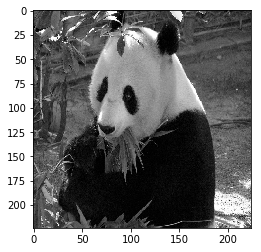

In [132]:
# torch vision grayscale object
panda_gray_obj = torchvision.transforms.functional.to_grayscale(Image.open('panda.jpg').resize((224,224)), num_output_channels=1)

# save as gray panda
panda_gray_obj.save('panda_gray.jpg')

# convert object to numpy array
panda_gray_np_array = np.array(panda_gray_obj)

# get shape of panda gray, shape is just width, height pixel dimensions
panda_gray_shape = panda_gray_np_array.shape

print (panda_gray_shape)

plt.imshow(panda_gray_obj)

# stays green for some reason
#plt.imshow(panda_gray_np_array)

(224, 224)


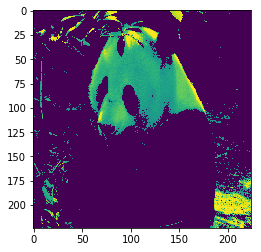

In [181]:
# convert grey panda to numpi array
grey_panda_nparray = np.array(grey_panda)

print (grey_panda_nparray.shape)

# have to pass shape thru np.zeros, (224,224) didn't work
bg_remov = np.zeros(grey_panda_nparray.shape)
threshold = 125;
area = 0;

for rows in range(grey_panda_nparray.shape[0]):
    for cols in range(grey_panda_nparray.shape[1]):
        pixel = grey_panda_nparray[rows,cols]
        if pixel > threshold:
            bg_remov[rows,cols] = grey_panda_nparray[rows,cols]
            
            
plt.imshow(grey_panda_nparray)
            
#plt.imshow(pixel)
plt.imshow(bg_remov)

In [185]:
saveImg = Image.fromarray(bg_remov.astype('uint8'))

saveImg.save('mask125.jpg')

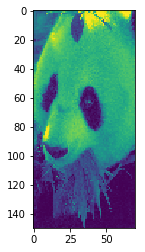

In [183]:
# crop image - useful for image detection
plt.imshow(panda_tensor[25:175,60:130,0].numpy())

In [150]:
# torch.eye(shape) produces a diagnal matrix with 1 as its diagonal elments
sales = torch.eye(3,3)
sales[0,1]


tensor(0.)